# Assignment 5: Pandas Fundamentals with Earthquake Data

In this assignment, we will review pandas fundamentals, such as how to

- Open csv files
- Manipulate dataframe indexes
- Parse date columns
- Examine basic dataframe statistics
- Manipulate text columns and extract values
- Plot dataframe contents using
  - Bar charts
  - Histograms
  - Scatter plots

First, import Numpy, Pandas and Matplotlib and set the display options.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# print("Test")
# Ref & Self Notes:
# https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e
# https://www.kaggle.com/shrishtiwahal/data-cleaning-challenge-parsing-dates
# https://www.codegrepper.com/code-examples/python/split+datetime+in+time+and+date+pandas
# https://www.projectpro.io/recipes/split-datetime-data-create-multiple-feature-in-python
# https://www.tutorialspoint.com/write-a-program-to-separate-date-and-time-from-the-datetime-column-in-python-pandas
# https://stackoverflow.com/questions/60842297/pandas-extract-a-phrase-from-one-column-and-adding-it-to-a-new-column
# https://stackoverflow.com/questions/54681095/pandas-dataframe-parse-string-column-to-extract-dates-into-new-column
# https://stackoverflow.com/questions/33408403/extracting-text-from-elements-in-pandas-column-writing-to-new-column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.insert.html

Data for this assignment in .csv format downloaded from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/) is available at:

http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv

You don't need to download this file. You can open it directly with Pandas.

### 1) Use Pandas' read_csv function directly on this URL to open it as a DataFrame
(Don't use any special options). Display the first few rows and the DataFrame info.

In [2]:
dataFile = "http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv"

#sep ='\s+'

df = pd.read_csv(dataFile) #, sep='\s+')

print(df.head())

                      time   latitude  longitude  depth   mag magType  nst  \
0  2014-01-31 23:53:37.000  60.252000  -152.7081  90.20  1.10      ml  NaN   
1  2014-01-31 23:48:35.452  37.070300  -115.1309   0.00  1.33      ml  4.0   
2  2014-01-31 23:47:24.000  64.671700  -149.2528   7.10  1.30      ml  NaN   
3  2014-01-31 23:30:54.000  63.188700  -148.9575  96.50  0.80      ml  NaN   
4  2014-01-31 23:30:52.210  32.616833  -115.6925  10.59  1.34      ml  6.0   

      gap     dmin     rms net          id                   updated  \
0     NaN      NaN  0.2900  ak  ak11155107  2014-02-05T19:34:41.515Z   
1  171.43  0.34200  0.0247  nn  nn00436847  2014-02-01T01:35:09.000Z   
2     NaN      NaN  1.0000  ak  ak11151142  2014-02-01T00:03:53.010Z   
3     NaN      NaN  1.0700  ak  ak11151135  2014-01-31T23:41:25.007Z   
4  285.00  0.04321  0.2000  ci  ci37171541  2014-02-01T00:13:20.107Z   

                               place        type  
0  26km S of Redoubt Volcano, Alaska  earthquak

In [3]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       120108 non-null  object 
 1   latitude   120108 non-null  float64
 2   longitude  120108 non-null  float64
 3   depth      120107 non-null  float64
 4   mag        120065 non-null  float64
 5   magType    120065 non-null  object 
 6   nst        59688 non-null   float64
 7   gap        94935 non-null   float64
 8   dmin       85682 non-null   float64
 9   rms        119716 non-null  float64
 10  net        120108 non-null  object 
 11  id         120108 non-null  object 
 12  updated    120108 non-null  object 
 13  place      120108 non-null  object 
 14  type       120108 non-null  object 
dtypes: float64(8), object(7)
memory usage: 13.7+ MB


In [5]:
print(df["time"].head()) #datetime 64

0    2014-01-31 23:53:37.000
1    2014-01-31 23:48:35.452
2    2014-01-31 23:47:24.000
3    2014-01-31 23:30:54.000
4    2014-01-31 23:30:52.210
Name: time, dtype: object


You should have seen that the dates were not automatically parsed into datetime types.

### 2) Re-read the data in such a way that all date columns are identified as dates and the earthquake ID is used as the index

Verify that this worked using the `head` and `info` functions.


In [6]:
# **** Not sure why, "  sep = '\s+'  ", is not working here, but other options like, " ',' ", are?

# df = pd.read_csv(dataFile, sep = '\s+') # engine = 'python') 
# df = pd.read_csv(dataFile, sep = ',')

df = pd.read_csv(dataFile, parse_dates = [0])

df = df.set_index("id")

df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [7]:
print(df.head())

                              time   latitude  longitude  depth   mag magType  \
id                                                                              
ak11155107 2014-01-31 23:53:37.000  60.252000  -152.7081  90.20  1.10      ml   
nn00436847 2014-01-31 23:48:35.452  37.070300  -115.1309   0.00  1.33      ml   
ak11151142 2014-01-31 23:47:24.000  64.671700  -149.2528   7.10  1.30      ml   
ak11151135 2014-01-31 23:30:54.000  63.188700  -148.9575  96.50  0.80      ml   
ci37171541 2014-01-31 23:30:52.210  32.616833  -115.6925  10.59  1.34      ml   

            nst     gap     dmin     rms net                   updated  \
id                                                                       
ak11155107  NaN     NaN      NaN  0.2900  ak  2014-02-05T19:34:41.515Z   
nn00436847  4.0  171.43  0.34200  0.0247  nn  2014-02-01T01:35:09.000Z   
ak11151142  NaN     NaN      NaN  1.0000  ak  2014-02-01T00:03:53.010Z   
ak11151135  NaN     NaN      NaN  1.0700  ak  2014-01-31T23:41

In [8]:
print(df["time"].head())  # Says datetime64

id
ak11155107   2014-01-31 23:53:37.000
nn00436847   2014-01-31 23:48:35.452
ak11151142   2014-01-31 23:47:24.000
ak11151135   2014-01-31 23:30:54.000
ci37171541   2014-01-31 23:30:52.210
Name: time, dtype: datetime64[ns]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120108 entries, ak11155107 to ak11453389
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   time       120108 non-null  datetime64[ns]
 1   latitude   120108 non-null  float64       
 2   longitude  120108 non-null  float64       
 3   depth      120107 non-null  float64       
 4   mag        120065 non-null  float64       
 5   magType    120065 non-null  object        
 6   nst        59688 non-null   float64       
 7   gap        94935 non-null   float64       
 8   dmin       85682 non-null   float64       
 9   rms        119716 non-null  float64       
 10  net        120108 non-null  object        
 11  updated    120108 non-null  object        
 12  place      120108 non-null  object        
 13  type       120108 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 13.7+ MB


In [10]:
df['date'] = pd.to_datetime(df['time'], format = "%Y/%m/%d")

df['date'].head()

id
ak11155107   2014-01-31 23:53:37.000
nn00436847   2014-01-31 23:48:35.452
ak11151142   2014-01-31 23:47:24.000
ak11151135   2014-01-31 23:30:54.000
ci37171541   2014-01-31 23:30:52.210
Name: date, dtype: datetime64[ns]

In [11]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,date
id,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,2014-01-31 23:53:37.000
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,2014-01-31 23:48:35.452
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,2014-01-31 23:47:24.000
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,2014-01-31 23:30:54.000
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,2014-01-31 23:30:52.210


In [12]:
df['date'] = pd.to_datetime(df['time']).dt.date
df['time'] = pd.to_datetime(df['time']).dt.time

df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,date
id,,,,,,,,,,,,,,,
ak11155107,23:53:37,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,2014-01-31
nn00436847,23:48:35.452000,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,2014-01-31
ak11151142,23:47:24,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,2014-01-31
ak11151135,23:30:54,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,2014-01-31
ci37171541,23:30:52.210000,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,2014-01-31


In [13]:
df = pd.read_csv(dataFile) #, sep='\s+')

nCol = df["time"].str.split(" ")
t = nCol.to_list()
tD = ["date", "time"]
df1 = pd.DataFrame(t, columns = tD)

df1.head()

,date,time
0,2014-01-31,23:53:37.000
1,2014-01-31,23:48:35.452
2,2014-01-31,23:47:24.000
3,2014-01-31,23:30:54.000
4,2014-01-31,23:30:52.210


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    120108 non-null  object
 1   time    120108 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


In [15]:
"""df = pd.read_csv(dataFile, sep='\s+',
                 parse_dates=[1])
df.info()
"""

"df = pd.read_csv(dataFile, sep='\\s+',\n                 parse_dates=[1])\ndf.info()\n"

### 3) Use `describe` to get the basic statistics of all the columns

Note the highest and lowest magnitude of earthquakes in the databse.

In [16]:
#print(df.describe())
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
std,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046
min,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000


### 4) Use `nlargest` to get the top 20 earthquakes by magnitude

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nlargest.html

In [17]:
mags1 = df.nlargest(20, "mag")

mags1

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
37371,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,usc000nzvd,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
50562,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,usc000rki5,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
36918,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,usc000p27i,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
33808,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,usc000phx5,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
31496,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,usb000pr89,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
33537,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.885,1.00,us,usc000piqj,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
95913,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.078,0.70,us,usb000slwn,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
31850,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.250,1.20,us,usb000pq41,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
34318,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.729,0.88,us,usc000pft9,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake
106285,2014-11-15 02:31:41.720,1.8929,126.5217,45.00,7.1,mww,NaN,18.0,1.397,0.71,us,usc000sxh8,2015-03-20T18:42:02.735Z,"154km NW of Kota Ternate, Indonesia",earthquake


In [18]:
mags1.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
37371,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,usc000nzvd,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
50562,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,usc000rki5,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
36918,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,usc000p27i,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
33808,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,usc000phx5,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
31496,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,usb000pr89,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake


Examine the structure of the `place` column. The state / country information seems to be in there. How would you get it out?

### 5) Extract the state or country using Pandas [text data functions](https://pandas.pydata.org/pandas-docs/stable/text.html)

Add it as a new column to the dataframe called `country`. Note that some of the "countries" are actually U.S. states.

In [19]:
# df.place
# df["place"]

places = df["place"]
places.head()
places

0         26km S of Redoubt Volcano, Alaska
1                   32km S of Alamo, Nevada
2          12km NNW of North Nenana, Alaska
3                22km S of Cantwell, Alaska
4              10km WNW of Progreso, Mexico
                        ...                
120103            29km SW of Valdez, Alaska
120104     102km SSE of Old Iliamna, Alaska
120105          9km WNW of Cobb, California
120106             57km NW of Ester, Alaska
120107          78km WSW of Cordova, Alaska
Name: place, Length: 120108, dtype: object

In [20]:
type(df["place"])


pandas.core.series.Series

In [21]:
df["place"].shape

(120108,)

In [22]:

#df.insert(15, "country", df["place"], False)

df['country'] = df['place'].apply(lambda x: x.split(",")[-1] if len(x.split()) >= 1 else None) 
df.head()



,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,country
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,Nevada
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,Alaska
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,Alaska
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,Mexico


In [23]:
#df['place'] = df['place'].map(lambda x: x.lstrip(",").rstrip('Aa-Za'))

#df.head()

In [24]:
#df['place'] = df.iloc[:,0].str.extract(",", "")

#df['col1'] = df['place'].str.extract(r"\,(,)\ ")
#df['col2'] = df['place'].str.replace(r"\,(,)\ ", "")

#df["place"] = df.place.str.replace(",?", "")

#df["place"]

In [25]:
df.nlargest(20, "mag")

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,country
37371,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,usc000nzvd,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake,Chile
50562,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,usc000rki5,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake,Alaska
36918,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,usc000p27i,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake,Chile
33808,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,usc000phx5,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake,Solomon Islands
31496,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,usb000pr89,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake,Papua New Guinea
33537,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.885,1.00,us,usc000piqj,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake,Solomon Islands
95913,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.078,0.70,us,usb000slwn,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake,El Salvador
31850,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.250,1.20,us,usb000pq41,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake,Mexico
34318,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.729,0.88,us,usc000pft9,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake,Papua New Guinea
106285,2014-11-15 02:31:41.720,1.8929,126.5217,45.00,7.1,mww,NaN,18.0,1.397,0.71,us,usc000sxh8,2015-03-20T18:42:02.735Z,"154km NW of Kota Ternate, Indonesia",earthquake,Indonesia


### 6) Display each unique value from the new column

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html

In [26]:
unique = pd.Series(df["country"], name = 'Unique Country').unique()

print(unique)

[' Alaska' ' Nevada' ' Mexico' ' California' ' Papua New Guinea'
 ' New Zealand' ' Missouri' 'South of the Fiji Islands' ' Montana'
 ' British Virgin Islands' ' Washington' ' Oregon' ' Canada' ' Fiji'
 'Wyoming' ' Antarctica' ' Chile' ' Utah' ' Indonesia' ' Solomon Islands'
 ' Micronesia' ' Oklahoma' ' Hawaii' ' Wyoming' ' Russia' ' Arizona'
 ' Philippines' ' Bolivia' ' Greece' ' Japan' ' Puerto Rico' ' Iran'
 ' Tonga' ' Wallis and Futuna' ' Colorado' ' Guam' ' CA' 'Carlsberg Ridge'
 ' Idaho' ' Pakistan' 'Off the west coast of northern Sumatra' ' Burma'
 ' China' ' Peru' 'Off the east coast of the North Island of New Zealand'
 ' Costa Rica' 'Reykjanes Ridge' ' East Timor' 'Central East Pacific Rise'
 'Mid-Indian Ridge' ' Japan region' ' Northern Mariana Islands'
 ' El Salvador' ' Samoa' 'Northern Mid-Atlantic Ridge' ' Taiwan'
 ' Arkansas' ' South Sandwich Islands' ' Colombia' ' Dominican Republic'
 ' Argentina' ' Texas' ' New Hampshire' ' Saint Helena'
 'West of Vancouver Island' ' Tan

In [27]:
uniqueCountry = pd.Series(pd.Categorical(df["country"])).unique()

uniqueCountry

[' Alaska', ' Nevada', ' Mexico', ' California', ' Papua New Guinea', ..., ' Kosovo', ' Saint Lucia', 'Antarctica', 'Off the south coast of Northwest Africa', ' Sierra Leone']
Length: 343
Categories (343, object): [' ', ' Afghanistan', ' Alabama', ' Alaska', ..., 'southern Idaho', 'western Montana', 'western Texas', 'western Xizang']

### 7) Make a bar chart of the top 5 earthquake magnitudes vs country/state 

In [28]:
gb = df.groupby("country")
check = gb.mag.aggregate(np.max).nlargest(5)
check

country
 Chile               8.2
 Alaska              7.9
 Solomon Islands     7.6
 Papua New Guinea    7.5
 El Salvador         7.3
Name: mag, dtype: float64

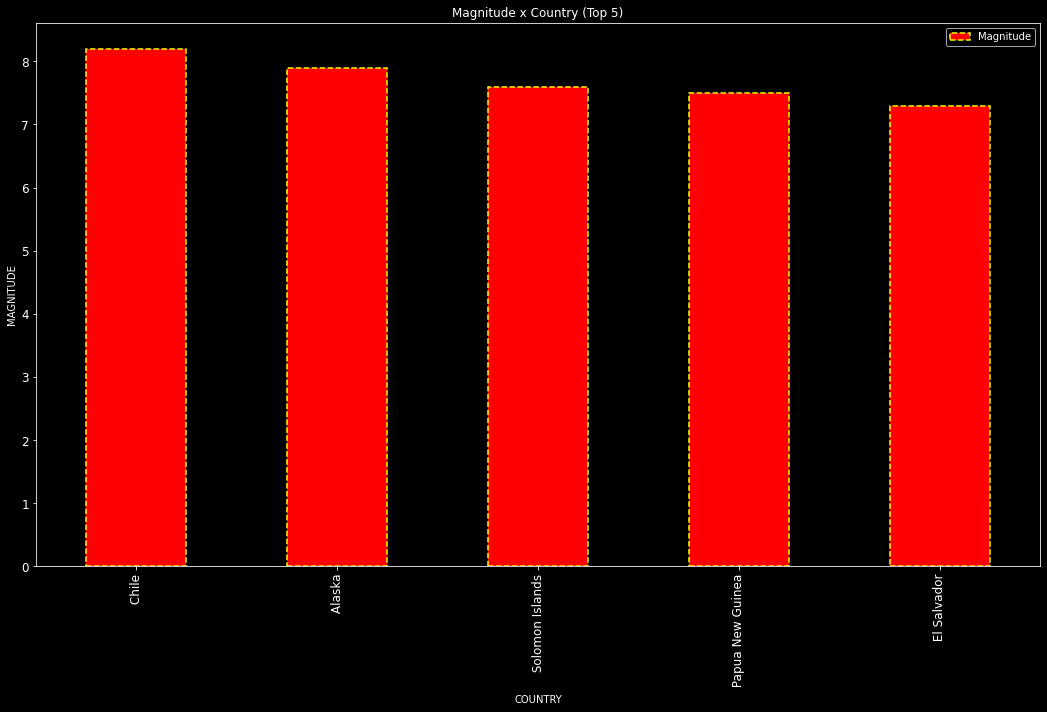

In [29]:
#check = df.Series(df.nlargest(5, "mag"))#, index = df["country"])

#check = pd.Series(df["mag"], index = df["country"])

#check = df.nlargest(5, "mag")

# df.groupby("country").mag.count().nlargest(5).plot(kind = "bar", figsize = (18,10))

plt.style.use("dark_background")

check.plot(kind = "bar",
           figsize = (18, 10),
           fontsize = 12,
           title = "Magnitude x Country (Top 5)",
           #grid = True,
           linestyle = "--",
           label = "Magnitude",
           legend = True,
           xlabel = "COUNTRY",
           ylabel = "MAGNITUDE",
           sort_columns = True,
           facecolor = "red",
           edgecolor = "yellow",
           lw = 1.5
          );

### 8) Create a filtered dataset that only has earthquakes of magnitude 4 or larger and

In [30]:
dfMag = df[df.mag > 4]
dfMag

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,country
10,2014-01-31 23:08:03.660,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,usc000mqlp,2014-04-08T01:43:19.000Z,"115km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
14,2014-01-31 22:54:32.970,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,usc000mqln,2014-04-08T01:43:19.000Z,"120km N of Raoul Island, New Zealand",earthquake,New Zealand
16,2014-01-31 22:49:49.740,-23.1192,179.1174,528.34,4.4,mb,NaN,80.0,5.439,0.95,us,usc000mqls,2014-04-08T01:43:19.000Z,South of the Fiji Islands,earthquake,South of the Fiji Islands
26,2014-01-31 22:19:44.330,51.1569,-178.0910,37.50,4.2,mb,NaN,NaN,NaN,0.83,us,usc000mf1x,2014-04-08T01:43:19.000Z,"72km E of Amatignak Island, Alaska",earthquake,Alaska
31,2014-01-31 21:56:44.320,-4.8800,153.8434,112.66,4.3,mb,NaN,199.0,1.808,0.79,us,usc000mqlm,2014-04-08T01:43:19.000Z,"100km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120064,2014-12-01 02:56:07.950,21.2031,143.5484,11.05,4.4,mb,NaN,107.0,5.996,0.87,us,usc000t6yh,2015-02-24T00:35:14.040Z,"158km WNW of Farallon de Pajaros, Northern Mar...",earthquake,Northern Mariana Islands
120077,2014-12-01 01:50:23.380,-7.8798,106.4275,52.10,4.3,mb,NaN,119.0,1.412,1.50,us,usc000t6y2,2015-02-24T00:35:14.040Z,"57km SSW of Cibungur, Indonesia",earthquake,Indonesia
120090,2014-12-01 01:04:17.890,7.1429,126.8844,176.67,4.3,mb,NaN,134.0,1.297,0.87,us,usc000t6y1,2015-02-24T00:35:14.040Z,"37km ESE of Santiago, Philippines",earthquake,Philippines
120098,2014-12-01 00:40:02.720,37.2096,71.9458,95.57,4.2,mb,NaN,125.0,1.097,0.91,us,usb000t1gp,2015-02-24T00:35:14.040Z,"11km ESE of Roshtqal'a, Tajikistan",earthquake,Tajikistan


In [31]:
dfMa = df["mag"]
dfMa

0         1.10
1         1.33
2         1.30
3         0.80
4         1.34
          ... 
120103    3.80
120104    2.40
120105    0.43
120106    0.40
120107    1.60
Name: mag, Length: 120108, dtype: float64

### 9) Make a histogram the distribution of the Earthquake magnitudes

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.hist.html
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

Do one subplot for the filtered and one for the unfiltered dataset.
Use a Logarithmic scale. What sort of relationship do you see?

In [32]:
gQ = df.groupby("mag")
ch = gb.mag.aggregate(np.max).nlargest(5)
ch

country
 Chile               8.2
 Alaska              7.9
 Solomon Islands     7.6
 Papua New Guinea    7.5
 El Salvador         7.3
Name: mag, dtype: float64

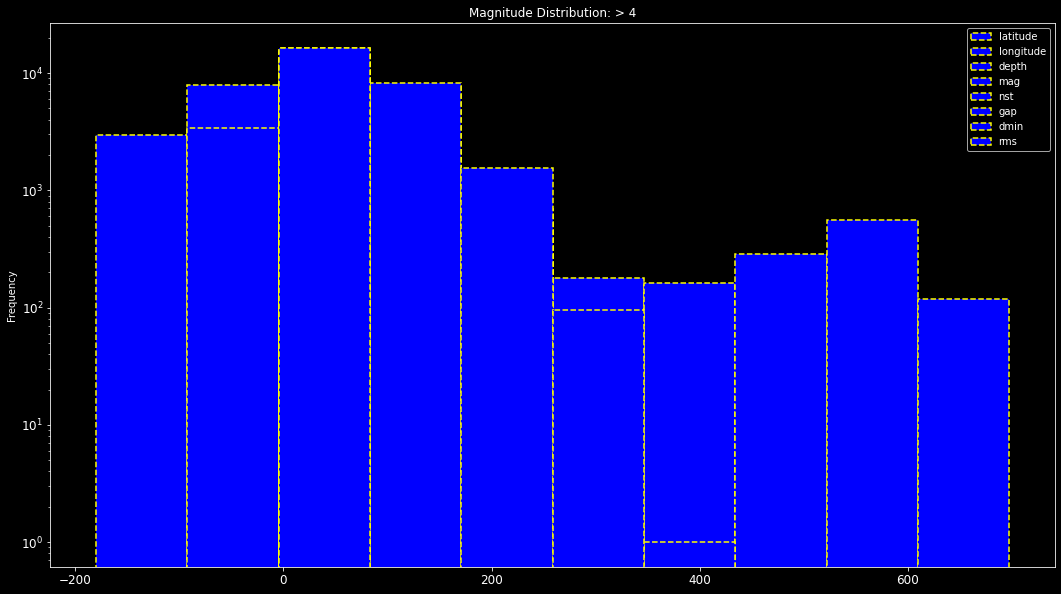

In [33]:

 #hist(df[,col])

#testMag = df.nlargest(15000, "mag")

plt.style.use("dark_background")

dfMag.plot(kind = "hist", log = True,
           figsize = (18, 10),
           fontsize = 12,
           title = "Magnitude Distribution: > 4",
           #grid = True,
           linestyle = "--",
           label = "Magnitude",
           legend = True,
           xlabel = "Magnitude",
           ylabel = "Frequency (Log)",
           #sort_columns = True,
           facecolor = "blue",
           edgecolor = "yellow",
           lw = 1.5
          );

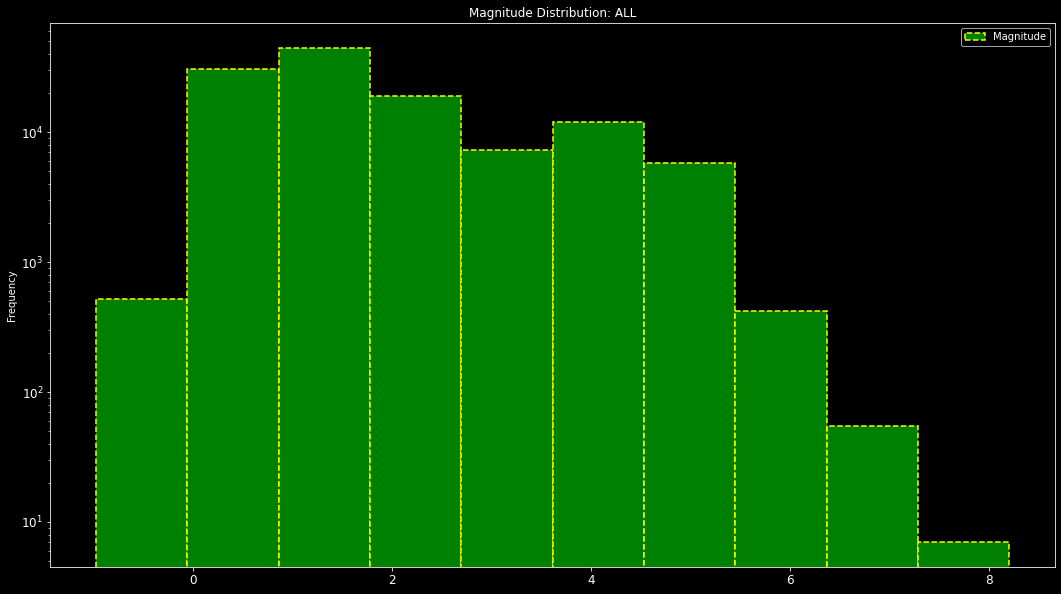

In [34]:
plt.style.use("dark_background")

dfMa.plot(kind = "hist", log = True,
           figsize = (18, 10),
           fontsize = 12,
           title = "Magnitude Distribution: ALL",
           #grid = True,
           linestyle = "--",
           label = "Magnitude",
           legend = True,
           xlabel = "Magnitude",
           ylabel = "Frequency (Log)",
           sort_columns = True,
           facecolor = "green",
           edgecolor = "yellow",
           lw = 1.5
          );

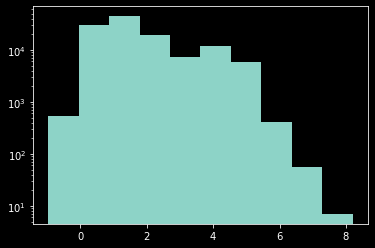

In [35]:
x = dfMag
y = dfMa

plt.hist(y, log = True)
plt.show()


In [ ]:
x = dfMag
y = dfMa

plt.hist(x, log = True)
plt.show()


In [37]:

#plt.style.use("dark_background")

#dfMa.hist(log = True);


#N_points = 1000
#n_bins = 200
# Generate a normal distribution, center at x=0 and y=5
"""
x = dfMag
y = dfMa

fig, axs = plt.subplots(1, 2, sharey = True, tight_layout = True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x)
axs[1].hist(y)

plt.show()
"""

'\nx = dfMag\ny = dfMa\n\nfig, axs = plt.subplots(1, 2, sharey = True, tight_layout = True)\n\n# We can set the number of bins with the `bins` kwarg\naxs[0].hist(x)\naxs[1].hist(y)\n\nplt.show()\n'

### 11) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude

Use a two-column subplot with both the filtered and unfiltered datasets. Color the points by magnitude. Make it pretty

What difference do you note between the filtered and unfiltered datasets?

In [38]:
gg = df.groupby("longitude")
latLon = gg.latitude.aggregate(np.max)
latLon


longitude
-179.9989   -24.9224
-179.9972   -23.5551
-179.9970    51.6380
-179.9960    51.3090
-179.9936   -34.5972
              ...   
 179.9946   -27.3299
 179.9960   -37.7350
 179.9964    51.0365
 179.9975   -23.7295
 179.9980    51.1137
Name: latitude, Length: 84467, dtype: float64

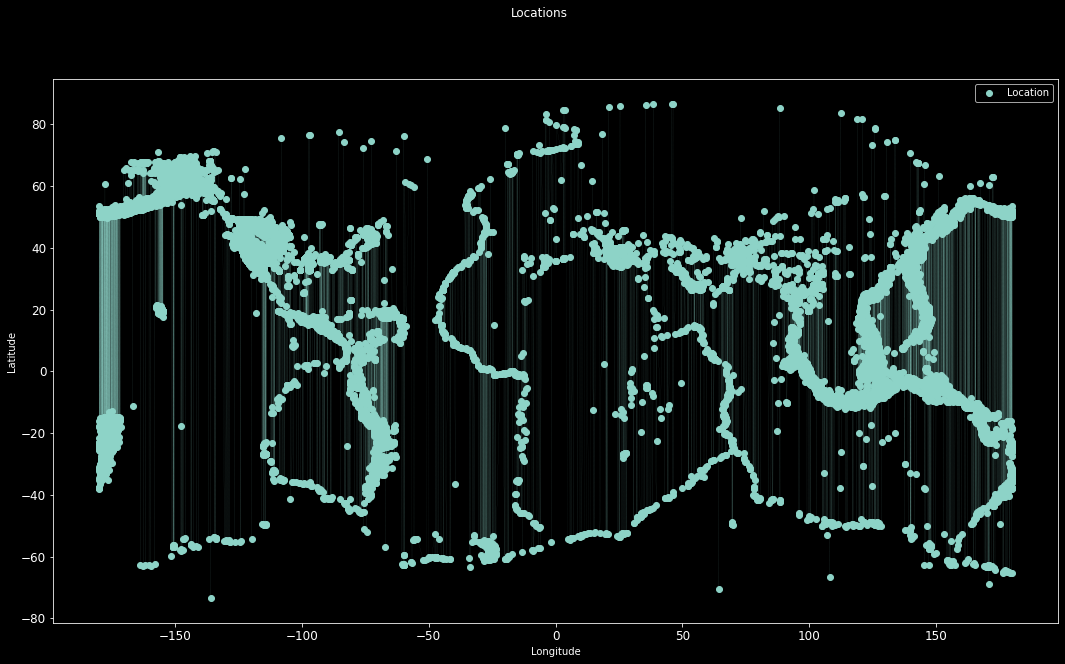

In [39]:

plt.style.use("dark_background")

latLon.plot(marker = "o", subplots = True , sharex = True, sharey = True,
           figsize = (18, 10),
           fontsize = 12,
           title = "Locations",
           #grid = True,
           linestyle = "--",
           label = "Location",
           legend = True,
           xlabel = "Longitude",
           ylabel = "Latitude",
           sort_columns = True,
           lw = .05
          );

In [40]:
#df.groupby('latitude').longitude.count().plot(kind='bar', figsize=(12,6))


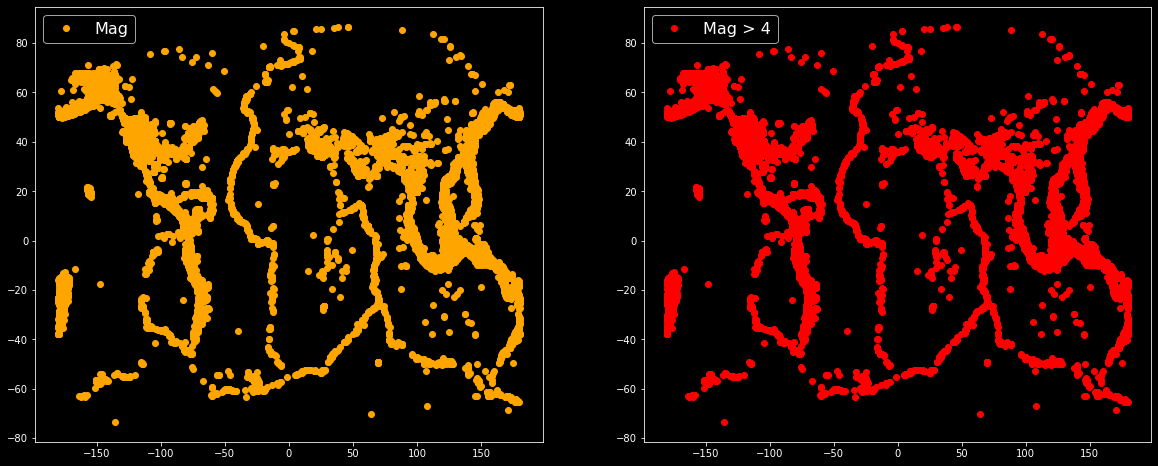

In [59]:
x = df["longitude"]
y = df["latitude"]

#xx = df["magnitude"] > 4
#yy = df["latitude"] > 4

#xx = df[df.latitude > 4]
#yy = df[df.longitude > 4]

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8)) #, cmap = "afmhot")

axes[0].plot(x, y, 'o', c = 'orange', label = 'Mag')

axes[1].plot(x, y, 'o', c = 'red', label = 'Mag > 4')

axes[0].legend(fontsize = 16)
axes[1].legend(fontsize = 16) 

In [44]:
#df.groupby('longitude').latitude.count().plot(kind = "scatter", figsize=(12,6))